In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def plot_mean_roc_with_shade(df, models, filename, title):
    model_colors = {models[2]: '#3C5488FF',
        models[1]: '#F39B7FFF', 
            models[0]: '#00A087FF',
        models[3]: '#8491B4FF',  # New
        models[4]: '#91D1C2FF' 
    }
    # plt.figure(figsize=(10, 6))
    # models = [df['model'].unique()[2], df['model'].unique()[0], df['model'].unique()[1]]
    for model in models:
        data = df[df['model'] == model]
        color = model_colors[model]
        plt.plot(data['fpr'], data['mean_tpr'], label=f'{model} (AUC = {data["mean_auc"].mean():.2f})', color = color)
        plt.fill_between(data['fpr'], data['mean_tpr'] - data['std_tpr'], data['mean_tpr'] + data['std_tpr'], alpha=0.1)
    
    plt.plot([0, 1], [0, 1], ":k", label="No discrimination", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.title(title)
    plt.savefig(f'./figures/{filename}.pdf', bbox_inches='tight', dpi=300, format='pdf')
    plt.savefig(f'./figures/{filename}.tiff', bbox_inches='tight', dpi=300, format='tiff')
    plt.savefig(f'./figures/{filename}.jpg', bbox_inches='tight', dpi=300, format='jpg')
    plt.show()

# def plot_mean_importance_with_std_bar(df, model_name, filename, title):
#     data = df[df['model'] == model_name].sort_values(by='mean_importance', ascending=True)
#     plt.figure(figsize=(10, 6))
#     # palette = sns.color_palette("viridis", n_colors=len(data['feature']))
    
#     # Compute custom error bounds
#     lower_error = np.where(data['mean_importance'] - data['std_importance'] < 0, 
#                            data['mean_importance'], 
#                            data['std_importance'])
    
#     upper_error = data['std_importance']
#     asymmetric_error = [lower_error, upper_error]

#     plt.barh(data['feature'], data['mean_importance'], xerr=asymmetric_error, 
#              capsize=5, color= '#3C5488FF')
#     plt.title(title)
#     # plt.ylabel('Feature')
#     plt.xlabel('SHAP values')
#     plt.grid(True, which='both', axis='x')
#     plt.savefig(f'./figures//{filename}.pdf', bbox_inches='tight', dpi=300, format='pdf')
#     plt.savefig(f'./figures/{filename}.tiff', bbox_inches='tight', dpi=300, format='tiff')
#     plt.savefig(f'./figures/{filename}.jpg', bbox_inches='tight', dpi=300, format='jpg')
#     plt.show()

In [10]:
def plot_mean_importance_with_std_bar(df, model_name, filename, title):
    data = df[df['model'] == model_name].sort_values(by='mean_importance', ascending=True)
    plt.figure(figsize=(10, 6))
    # palette = sns.color_palette("viridis", n_colors=len(data['feature']))
    
    # Compute custom error bounds
    lower_error = np.where(data['mean_importance'] - data['std_importance'] < 0, 
                           data['mean_importance'], 
                           data['std_importance'])
    
    upper_error = data['std_importance']
    asymmetric_error = [lower_error, upper_error]

    bars = plt.barh(data['feature'], data['mean_importance'], xerr=asymmetric_error, 
             capsize=5, color= '#3C5488FF')
    right_side = max(data['mean_importance'] + upper_error)
    text_offset = right_side * 0.05
    # for bar in bars:
    #     plt.text(right_side + text_offset, bar.get_y() + bar.get_height() / 2,
    #              f'{bar.get_width():.2f}', 
    #              va='center', ha='left', fontsize=12) 
    y_positions = np.arange(len(data))
    for y_pos, mean, std in zip(y_positions, data['mean_importance'], data['std_importance']):
        plt.text(mean + std + 0.02, y_pos, f"{mean:.2f}", 
                 va='center', ha='left', color='black', fontsize=12)
    plt.title(title)
    # plt.ylabel('Feature')
    plt.yticks(y_positions, data['feature'], fontsize=12)
    plt.xlabel('SHAP values', fontsize=12)
    plt.xlim(0, max(data['mean_importance'] + data['std_importance']) * 1.1)
    plt.tick_params(axis='x', labelsize=12)
    # plt.grid(True, which='both', axis='x')
    plt.savefig(f'./figures/{filename}.pdf', bbox_inches='tight', dpi=300, format='pdf')
    plt.savefig(f'./figures/{filename}.tiff', bbox_inches='tight', dpi=300, format='tiff')
    plt.savefig(f'./figures/{filename}.jpg', bbox_inches='tight', dpi=300, format='jpg')
    plt.show()

In [13]:
def plot_figure_XGboost(encoding, sex):
    auc_results_df = pd.read_csv(f'./{sex}/XGboost_100_three_models/{encoding}/auc_results_df.csv', index_col=0)
    feature_importance_results_df= pd.read_csv(f'./{sex}/XGboost_100_three_models/{encoding}/feature_importance_results_df.csv', index_col=0)
   # Compute the mean and standard deviation for the ROC curves and feature importance
    # For the AUC values:
    roc_mean_std = auc_results_df.groupby(['model', 'fpr']).agg(
        mean_tpr=pd.NamedAgg(column='tpr', aggfunc='mean'),
        std_tpr=pd.NamedAgg(column='tpr', aggfunc='std'),
        mean_auc=pd.NamedAgg(column='auc', aggfunc='mean'),
        std_auc=pd.NamedAgg(column='auc', aggfunc='std')
    ).reset_index()
    roc_mean_std['model'] = roc_mean_std['model'].replace(r'PredMetS', 'GenMetS', regex=True)
    roc_mean_std['model'] = roc_mean_std['model'].replace(r'covariates only', 'Covariates', regex=True)

    # For the feature importances:
    feature_mean_std = feature_importance_results_df.groupby(['model', 'feature']).agg(
        mean_importance=pd.NamedAgg(column='feature_importance', aggfunc='mean'),
        std_importance=pd.NamedAgg(column='feature_importance', aggfunc='std')
    ).reset_index()
    feature_mean_std['model'] = feature_mean_std['model'].replace(r'PredMetS', 'GenMetS', regex=True)
    feature_mean_std['model'] = feature_mean_std['model'].replace(r'covariates only', 'Covariates', regex=True)
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'PredMetS', 'GenMetS', regex=True)
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'covariates only', 'Covariates', regex=True)
    ## Renamme the feature columns, make 'PhysicalActivity' into 'Physical Activity'
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'PhysicalActivity', 'Physical Activity', regex=True)
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'SocialEconomicalStatus', 'Social Economical Status', regex=True)
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'Sleephour', 'Sleep Hour', regex=True)
    feature_mean_std['feature'] = feature_mean_std['feature'].replace(r'TVhour', 'TV Hour', regex=True)
    models = [roc_mean_std['model'].unique()[3], roc_mean_std['model'].unique()[0], roc_mean_std['model'].unique()[4], roc_mean_std['model'].unique()[1], roc_mean_std['model'].unique()[2]]

    # Now call the plotting function for ROC curve with all models
    if sex == 'Both':
        plot_mean_roc_with_shade(roc_mean_std, models = models, filename=f'ROC_XGboost_{sex}', title="ROC Curve for Multimorbidity Prediction")
        plot_mean_importance_with_std_bar(feature_mean_std, 'GenMetS + covariates', filename=f'Feature_Importance_{sex}', title='Feature Importance for GenMetS + covariates')
    elif sex == 'Female':
        plot_mean_roc_with_shade(roc_mean_std, models = models, filename=f'ROC_XGboost_{sex}', title=f"ROC Curve for Multimorbidity Prediction for women")
        plot_mean_importance_with_std_bar(feature_mean_std, 'GenMetS + covariates', filename=f'Feature_Importance_{sex}', title=f'Feature Importance for GenMetS + covariates (women)')
    else:
        plot_mean_roc_with_shade(roc_mean_std, models = models, filename=f'ROC_XGboost_{sex}', title=f"ROC Curve for Multimorbidity Prediction for men")
        plot_mean_importance_with_std_bar(feature_mean_std, 'GenMetS + covariates', filename=f'Feature_Importance_{sex}', title=f'Feature Importance for GenMetS + covariates (men)')

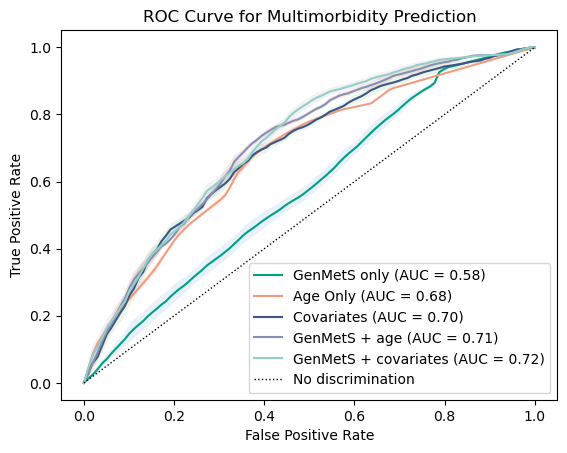

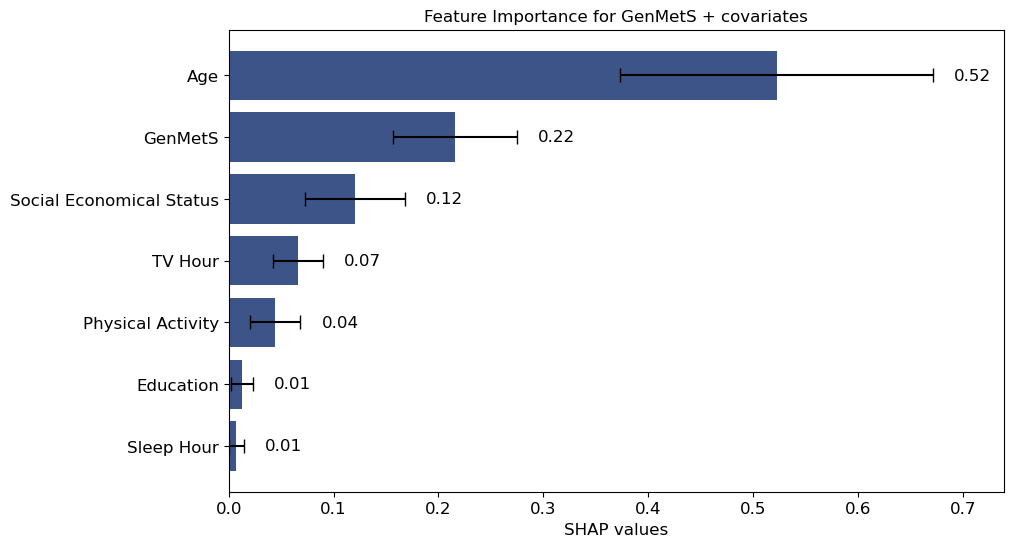

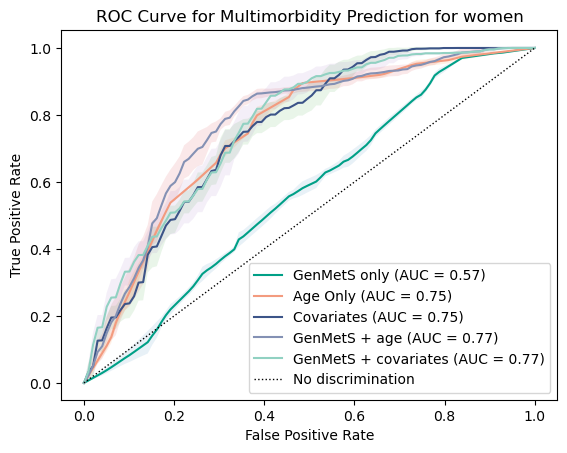

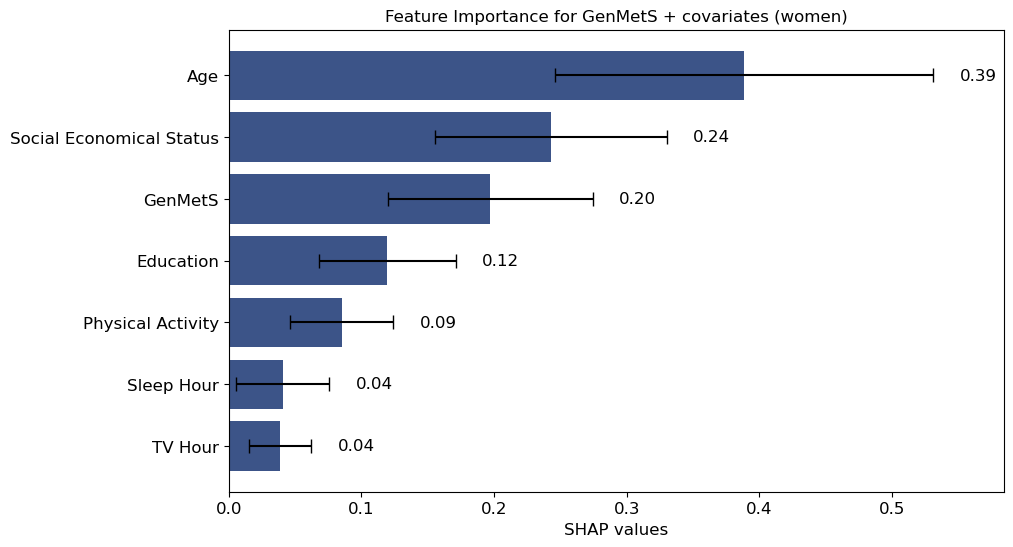

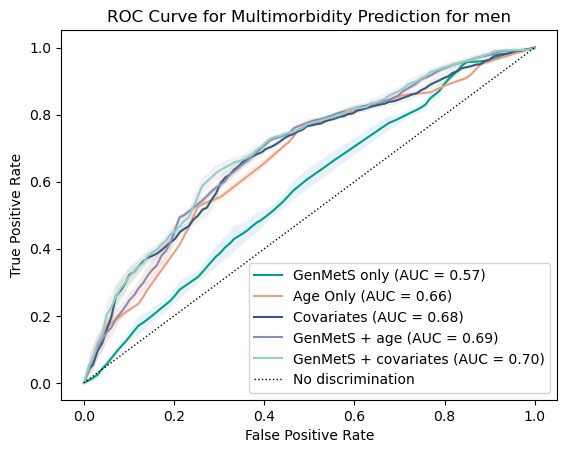

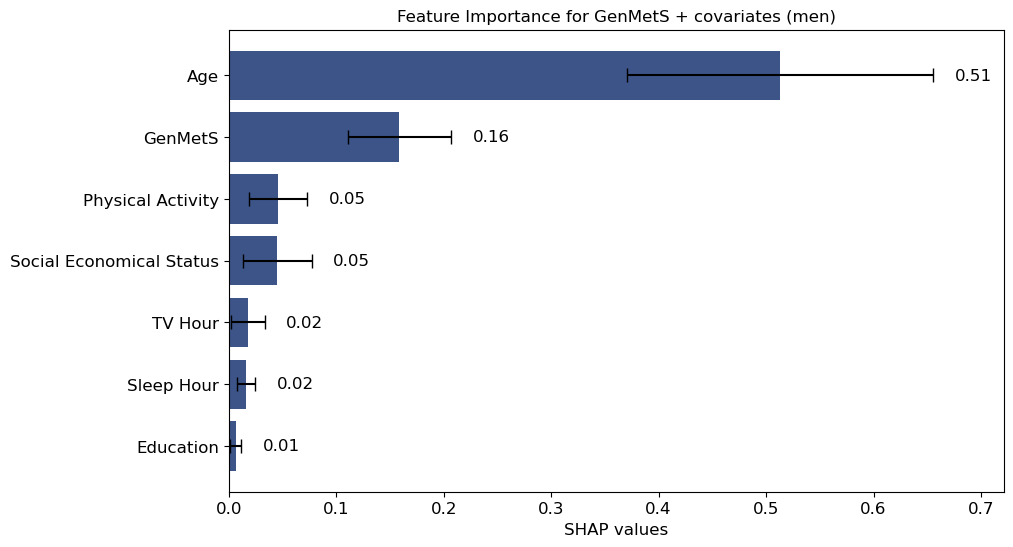

In [14]:
for sex in ['Both', 'Female', 'Male']:
    plot_figure_XGboost('normalize', sex = sex)